In [345]:
#Importação dos pacotes necessários
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [346]:
#Arquivos de treino e teste
treino=pd.read_csv('train.csv')
teste=pd.read_csv('test.csv')
teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [347]:
treino.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [348]:
prova_brasil=pd.read_csv("saeb_resultados2017.csv", sep=";")
prova_brasil.head()

,ID,DEPENDENCIA_ADM,LOCALIZACAO,CAPITAL,MEDIA_5_LP,MEDIA_5_MT,MEDIA_9_LP,MEDIA_9_MT,MEDIA_12_LP,MEDIA_12_MT,...,nivel_1_MT12,nivel_2_MT12,nivel_3_MT12,nivel_4_MT12,nivel_5_MT12,nivel_6_MT12,nivel_7_MT12,nivel_8_MT12,nivel_9_MT12,nivel_10_MT12
0,Brasil,Estadual,Rural,Capital,"203,93","213,37","242,55","240,05","242,45","243,99",...,"23,74","21,05","11,71","7,27","2,61","0,58","0,14","0,09",0,0
1,Brasil,Estadual,Rural,Interior,"194,93","205,41","242,3","242,97","242,5","245,01",...,"21,59","18,69","11,89","7,19","3,61","1,36","0,41","0,09","0,03",0
2,Brasil,Estadual,Rural,Total,"196,53","206,83","242,32","242,74","242,5","244,97",...,"21,68","18,79","11,88","7,19","3,57","1,33","0,4","0,09","0,02",0
3,Brasil,Estadual,Total,Capital,"217,5","226,42","251,46","247,71","260,01","257,03",...,"19,06","18,96","14,87","10,35","5,97","2,43","0,79","0,24","0,06",0
4,Brasil,Estadual,Total,Interior,"217,68","227,3","255,07","253,85","259,2","259,91",...,"18,9","19,35","15,34","10,97","6,57","2,67","0,86","0,24","0,05",0


In [349]:
prova_brasil['MEDIA_9_MT']=prova_brasil['MEDIA_9_MT'].str.replace(',','.')
prova_brasil

,ID,DEPENDENCIA_ADM,LOCALIZACAO,CAPITAL,MEDIA_5_LP,MEDIA_5_MT,MEDIA_9_LP,MEDIA_9_MT,MEDIA_12_LP,MEDIA_12_MT,...,nivel_1_MT12,nivel_2_MT12,nivel_3_MT12,nivel_4_MT12,nivel_5_MT12,nivel_6_MT12,nivel_7_MT12,nivel_8_MT12,nivel_9_MT12,nivel_10_MT12
0,Brasil,Estadual,Rural,Capital,"203,93","213,37","242,55",240.05,"242,45","243,99",...,"23,74","21,05","11,71","7,27","2,61","0,58","0,14","0,09",0,0
1,Brasil,Estadual,Rural,Interior,"194,93","205,41","242,3",242.97,"242,5","245,01",...,"21,59","18,69","11,89","7,19","3,61","1,36","0,41","0,09","0,03",0
2,Brasil,Estadual,Rural,Total,"196,53","206,83","242,32",242.74,"242,5","244,97",...,"21,68","18,79","11,88","7,19","3,57","1,33","0,4","0,09","0,02",0
3,Brasil,Estadual,Total,Capital,"217,5","226,42","251,46",247.71,"260,01","257,03",...,"19,06","18,96","14,87","10,35","5,97","2,43","0,79","0,24","0,06",0
4,Brasil,Estadual,Total,Interior,"217,68","227,3","255,07",253.85,"259,2","259,91",...,"18,9","19,35","15,34","10,97","6,57","2,67","0,86","0,24","0,05",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Brasil,"Total - Federal, Estadual, Municipal e Privada",Total,Interior,"212,53","222,27","256,4",256.41,"265,51","267,8",...,"17,34","18,09","14,87","11,39","7,82","4,22","2,1","1,05","0,4",0
59,Brasil,"Total - Federal, Estadual, Municipal e Privada",Total,Total,"214,54","224,1","258,35",258.36,"267,61","269,74",...,"16,93","17,6","14,65","11,32","7,94","4,55","2,46","1,44","0,61","0,01"
60,Brasil,"Total - Federal, Estadual, Municipal e Privada",Urbana,Capital,"222,23","231,11","265,88",265.96,"274,22","275,88",...,"15,61","16,09",14,"11,1","8,34","5,59","3,59","2,65","1,25","0,02"
61,Brasil,"Total - Federal, Estadual, Municipal e Privada",Urbana,Interior,"216,62","226,14","259,23",259.24,"266,57","268,84",...,"17,15","18,07","15,01","11,59","8,01","4,35","2,17","1,09","0,42",0


In [350]:
prova_brasil.dtypes

ID                 object
DEPENDENCIA_ADM    object
LOCALIZACAO        object
CAPITAL            object
MEDIA_5_LP         object
                    ...  
nivel_6_MT12       object
nivel_7_MT12       object
nivel_8_MT12       object
nivel_9_MT12       object
nivel_10_MT12      object
Length: 70, dtype: object

In [351]:
prova_brasil['MEDIA_9_MT']=pd.to_numeric(prova_brasil['MEDIA_9_MT'],errors='coerce')

In [352]:
prova_brasil

,ID,DEPENDENCIA_ADM,LOCALIZACAO,CAPITAL,MEDIA_5_LP,MEDIA_5_MT,MEDIA_9_LP,MEDIA_9_MT,MEDIA_12_LP,MEDIA_12_MT,...,nivel_1_MT12,nivel_2_MT12,nivel_3_MT12,nivel_4_MT12,nivel_5_MT12,nivel_6_MT12,nivel_7_MT12,nivel_8_MT12,nivel_9_MT12,nivel_10_MT12
0,Brasil,Estadual,Rural,Capital,"203,93","213,37","242,55",240.05,"242,45","243,99",...,"23,74","21,05","11,71","7,27","2,61","0,58","0,14","0,09",0,0
1,Brasil,Estadual,Rural,Interior,"194,93","205,41","242,3",242.97,"242,5","245,01",...,"21,59","18,69","11,89","7,19","3,61","1,36","0,41","0,09","0,03",0
2,Brasil,Estadual,Rural,Total,"196,53","206,83","242,32",242.74,"242,5","244,97",...,"21,68","18,79","11,88","7,19","3,57","1,33","0,4","0,09","0,02",0
3,Brasil,Estadual,Total,Capital,"217,5","226,42","251,46",247.71,"260,01","257,03",...,"19,06","18,96","14,87","10,35","5,97","2,43","0,79","0,24","0,06",0
4,Brasil,Estadual,Total,Interior,"217,68","227,3","255,07",253.85,"259,2","259,91",...,"18,9","19,35","15,34","10,97","6,57","2,67","0,86","0,24","0,05",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Brasil,"Total - Federal, Estadual, Municipal e Privada",Total,Interior,"212,53","222,27","256,4",256.41,"265,51","267,8",...,"17,34","18,09","14,87","11,39","7,82","4,22","2,1","1,05","0,4",0
59,Brasil,"Total - Federal, Estadual, Municipal e Privada",Total,Total,"214,54","224,1","258,35",258.36,"267,61","269,74",...,"16,93","17,6","14,65","11,32","7,94","4,55","2,46","1,44","0,61","0,01"
60,Brasil,"Total - Federal, Estadual, Municipal e Privada",Urbana,Capital,"222,23","231,11","265,88",265.96,"274,22","275,88",...,"15,61","16,09",14,"11,1","8,34","5,59","3,59","2,65","1,25","0,02"
61,Brasil,"Total - Federal, Estadual, Municipal e Privada",Urbana,Interior,"216,62","226,14","259,23",259.24,"266,57","268,84",...,"17,15","18,07","15,01","11,59","8,01","4,35","2,17","1,09","0,42",0


In [353]:
media_serie_mt=prova_brasil.groupby(prova_brasil['LOCALIZACAO']).mean()['MEDIA_9_MT']
media_serie_mt

LOCALIZACAO
Rural     208.220476
Total     269.683810
Urbana    270.796667
Name: MEDIA_9_MT, dtype: float64

In [354]:
mt=prova_brasil['MEDIA_9_MT'].mean()
mt

249.56698412698412

In [355]:
pisa=pd.read_csv("Pisa_media_csv.csv", sep=";")
pisa.head(50)

,Jurisdiction,Average
0,Cambodia,325
1,Ecuador,377
2,Guatemala,334
3,Honduras,343
4,Paraguay,326
5,Senegal,304
6,Zambia,258
7,Australia,494
8,Austria,497
9,Belgium,507


In [356]:
pisa=pisa.sort_values(by='Average', ascending=True)
pisa.head(60)

,Jurisdiction,Average
6,Zambia,258
5,Senegal,304
0,Cambodia,325
4,Paraguay,326
53,Dominican Republic,328
2,Guatemala,334
3,Honduras,343
43,Algeria,360
60,Kosovo,362
76,Tunisia,367


In [357]:
pisa=pisa.sort_values(by='Average', ascending=False)
pisa.head(15)

,Jurisdiction,Average
72,Singapore,564
56,Hong Kong (China),548
63,Macao (China),544
73,Chinese Taipei,542
24,Japan,532
46,B-S-J-G (China),531
25,Korea,524
38,Switzerland,521
14,Estonia,520
10,Canada,516


In [358]:
#Analisando a relação ente os dados
print(set(teste.columns).issubset(set(treino.columns)))

True


In [359]:
#criando df de treino
df_treino=pd.DataFrame({'UF':treino.SG_UF_RESIDENCIA,'Idade':treino.NU_IDADE,'Sexo':treino.TP_SEXO,
                       'Raça':treino.TP_COR_RACA,'Sit_de_conc':treino.TP_ST_CONCLUSAO,
                       'Ano':treino.TP_ANO_CONCLUIU,'Tipo_escola':treino.TP_ESCOLA,
                       'Tipo_ensino':treino.TP_ENSINO,'Dependencia_Escola':treino.TP_DEPENDENCIA_ADM_ESC,
                       'NOTA_CN':treino.NU_NOTA_CN,'NOTA_CH':treino.NU_NOTA_CH,
                       'NOTA_LC':treino.NU_NOTA_LC,'NOTA_MT':treino.NU_NOTA_MT,'Q001':treino.Q001,
                        'Q002':treino.Q002,'Q006':treino.Q006,'Q024':treino.Q024,'Q025':treino.Q025,
                        'Q026':treino.Q026,'Q027':treino.Q027,'Q047':treino.Q047})
df_treino.head(20)

,UF,Idade,Sexo,Raça,Sit_de_conc,Ano,Tipo_escola,Tipo_ensino,Dependencia_Escola,NOTA_CN,...,NOTA_LC,NOTA_MT,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,RS,24,M,1,1,4,1,NaN,NaN,436.3,...,581.2,399.4,D,D,C,A,A,C,H,A
1,CE,17,F,3,2,0,2,1.0,2.0,474.5,...,599.0,459.8,A,A,B,A,A,A,NaN,A
2,CE,21,F,3,3,0,1,NaN,NaN,NaN,...,NaN,NaN,D,D,C,A,A,A,NaN,A
3,RJ,25,F,0,1,9,1,NaN,NaN,NaN,...,NaN,NaN,H,E,E,C,B,C,F,D
4,AM,28,M,2,1,4,1,NaN,NaN,NaN,...,NaN,NaN,E,D,C,A,A,B,F,A
5,BA,18,F,1,1,1,1,NaN,NaN,439.7,...,410.9,364.5,E,E,C,B,B,A,NaN,A
6,MT,18,F,3,2,0,2,1.0,2.0,420.1,...,484.5,529.2,E,D,C,B,B,C,E,A
7,RS,18,F,1,1,1,1,NaN,NaN,619.6,...,611.2,566.7,G,F,L,B,B,A,NaN,D
8,PE,16,F,3,2,0,2,1.0,2.0,500.5,...,521.8,372.4,H,E,B,A,B,A,NaN,A
9,MG,24,M,4,4,0,1,NaN,NaN,NaN,...,NaN,NaN,H,E,G,B,B,B,H,A


In [360]:
#analisando a correlação
correl=df_treino.corr()['NOTA_MT'].drop(['Tipo_ensino','Dependencia_Escola'])
print(correl)

Idade         -0.061485
Raça          -0.157364
Sit_de_conc   -0.087869
Ano            0.029039
Tipo_escola    0.069304
NOTA_CN        0.584941
NOTA_CH        0.529594
NOTA_LC        0.494695
NOTA_MT        1.000000
Name: NOTA_MT, dtype: float64


In [361]:
correl_final=correl[abs(correl)>0.02].drop(['NOTA_MT']) 
correl_final.shape

(8,)

In [362]:
correlacao = list(correl_final.index)
correlacao.append('NU_NOTA_MT')
print(correlacao)

['Idade', 'Raça', 'Sit_de_conc', 'Ano', 'Tipo_escola', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NU_NOTA_MT']


In [363]:
#usando sklearn
from sklearn.linear_model import LinearRegression

In [364]:
df_model=df_treino[['Idade', 'Raça', 'Sit_de_conc', 'Ano', 
                    'Tipo_escola', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT']]
df_model

,Idade,Raça,Sit_de_conc,Ano,Tipo_escola,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT
0,24,1,1,4,1,436.3,495.4,581.2,399.4
1,17,3,2,0,2,474.5,544.1,599.0,459.8
2,21,3,3,0,1,NaN,NaN,NaN,NaN
3,25,0,1,9,1,NaN,NaN,NaN,NaN
4,28,2,1,4,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13725,20,1,1,3,1,438.2,419.7,394.5,403.2
13726,33,3,1,10,1,423.8,557.9,533.0,452.4
13727,15,1,3,0,1,460.5,528.9,569.3,398.0
13728,36,3,4,0,1,422.5,621.7,569.0,386.6


In [365]:
df_model2=df_model.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_model2

,Idade,Raça,Sit_de_conc,Ano,Tipo_escola,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT
0,24,1,1,4,1,436.3,495.4,581.2,399.4
1,17,3,2,0,2,474.5,544.1,599.0,459.8
5,18,1,1,1,1,439.7,583.2,410.9,364.5
6,18,3,2,0,2,420.1,604.2,484.5,529.2
7,18,1,1,1,1,619.6,625.8,611.2,566.7
...,...,...,...,...,...,...,...,...,...
13725,20,1,1,3,1,438.2,419.7,394.5,403.2
13726,33,3,1,10,1,423.8,557.9,533.0,452.4
13727,15,1,3,0,1,460.5,528.9,569.3,398.0
13728,36,3,4,0,1,422.5,621.7,569.0,386.6


In [366]:
y=df_model2.NOTA_MT
x=df_model2.drop('NOTA_MT',axis=1)

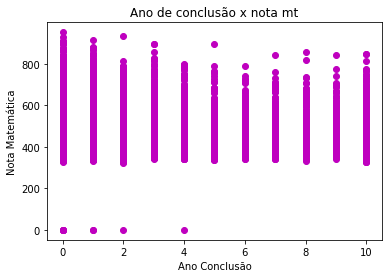

In [367]:
#analisando correlação
plt.scatter(df_model2.Ano,y, color='m')
plt.xlabel('Ano Conclusão')
plt.ylabel('Nota Matemática')
plt.title('Ano de conclusão x nota mt')
plt.show()

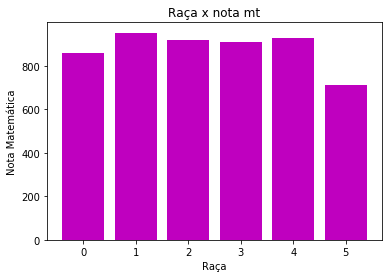

In [368]:
#analisando correlação
plt.bar(df_model2.Raça,y, color='m')
plt.xlabel('Raça')
plt.ylabel('Nota Matemática')
plt.title('Raça x nota mt')
plt.show()

In [369]:
raca=df_model2.groupby(["Raça"]).mean()["NOTA_MT"]
raca=pd.DataFrame(raca)
raca

,NOTA_MT
Raça,
0,494.071856
1,507.465972
2,467.041018
3,468.836730
4,491.057080
5,453.979688


In [370]:
hab=treino.groupby(["Q005"]).mean()["NU_NOTA_MT"]
hab

Q005
1     490.076471
2     486.550000
3     487.019899
4     489.288686
5     475.598503
6     471.304988
7     457.576923
8     457.214483
9     442.764615
10    455.016667
11    461.673333
12    450.366667
13    417.600000
14    388.233333
15    453.400000
16           NaN
17    519.000000
18    577.600000
20    547.933333
Name: NU_NOTA_MT, dtype: float64

In [371]:
hab_cont=treino.groupby(["Q005"]).count()["NU_NOTA_MT"]
hab_cont

Q005
1      153
2      978
3     2367
4     3279
5     1937
6      822
7      312
8      145
9       65
10      36
11      15
12       6
13       4
14       3
15       2
16       0
17       3
18       3
20       3
Name: NU_NOTA_MT, dtype: int64

In [372]:
hab=treino.groupby(["Q006"]).mean()["NU_NOTA_MT"]
hab

Q006
A    445.497590
B    449.291854
C    468.926789
D    484.777778
E    491.889961
F    509.922709
G    520.758468
H    544.732418
I    557.673636
J    565.094444
K    601.339241
L    590.639286
M    614.064444
N    601.639535
O    608.560377
P    651.070968
Q    655.198148
Name: NU_NOTA_MT, dtype: float64

In [373]:
hab=treino.groupby(["Q025"]).mean()["NU_NOTA_MT"]
hab

Q025
A    453.407017
B    503.488260
Name: NU_NOTA_MT, dtype: float64

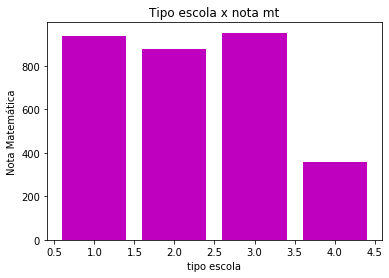

In [374]:
#analisando correlação
plt.bar(df_model2.Tipo_escola,y, color='m')
plt.xlabel('tipo escola')
plt.ylabel('Nota Matemática')
plt.title('Tipo escola x nota mt')
plt.show()

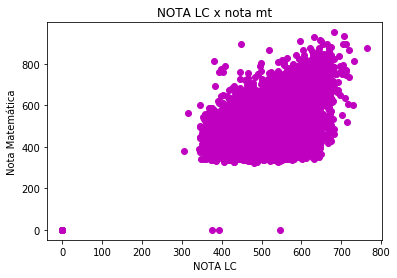

In [375]:
#analisando correlação
plt.scatter(df_model2.NOTA_LC,y, color='m')
plt.xlabel('NOTA LC')
plt.ylabel('Nota Matemática')
plt.title('NOTA LC x nota mt')
plt.show()

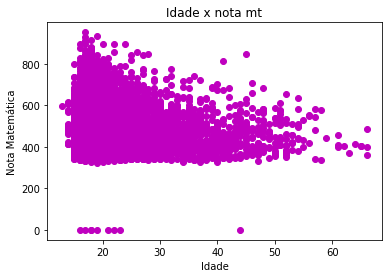

In [376]:
#analisando correlação
plt.scatter(df_model2.Idade,y, color='m')
plt.xlabel('Idade')
plt.ylabel('Nota Matemática')
plt.title('Idade x nota mt')
plt.show()

In [377]:
#treinando com método fit
regressao=LinearRegression()
type(regressao)

sklearn.linear_model._base.LinearRegression

In [378]:
regressao.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [379]:
print(regressao.intercept_)

9.472342301900312


In [380]:
regressao.predict(x)

array([470.88349189, 502.99828926, 461.68626247, ..., 492.12499702,
       469.33292227, 520.30175388])

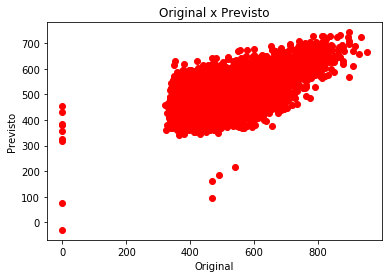

In [381]:
plt.scatter(df_model2.NOTA_MT,regressao.predict(x),color ='r')
plt.xlabel('Original')
plt.ylabel('Previsto')
plt.title('Original x Previsto')
plt.show()

In [382]:
#Calculando a média de erro
media_erro=np.mean((df_model2.NOTA_MT-regressao.predict(x))**2)
media_erro

5920.594530889428

In [383]:
#dividindo o modelo em treino e teste
#Função train_test_split promove a divisão randomica dos dados
from sklearn.model_selection import train_test_split

In [384]:
#dividindo os dados
#test size = 0.30 = 75% de treino, 25% teste
x_treino,x_teste, y_treino, y_teste= train_test_split(x,df_model2.NOTA_MT, test_size=0.25, 
                                                      random_state =5)
print(x_treino.shape,x_teste.shape, y_treino.shape, y_teste.shape)

(7572, 8) (2525, 8) (7572,) (2525,)


In [385]:
regr=LinearRegression()

In [386]:
regr.fit(x_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [387]:
#definindo treino e teste
pred_treino= regr.predict(x_treino)
pred_teste= regr.predict(x_teste)

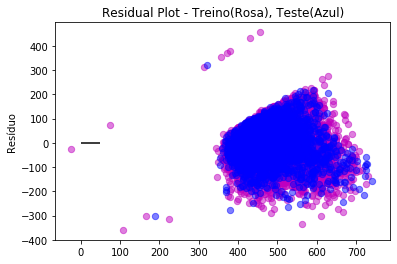

In [388]:
plt.scatter(regr.predict(x_treino), regr.predict(x_treino) - y_treino, c = 'm', s = 40, alpha = 0.5)
plt.scatter(regr.predict(x_teste), regr.predict(x_teste) - y_teste, c = 'b', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Rosa), Teste(Azul)")
plt.show()

In [389]:
teste_2=teste.set_index('NU_INSCRICAO')
teste_2

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,...,40.0,420.0,B,A,C,A,A,C,C,A
71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,...,100.0,580.0,E,B,C,B,B,B,F,A
b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,...,80.0,320.0,E,E,D,B,B,A,NaN,A
70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,...,NaN,NaN,H,E,G,B,B,A,NaN,A
715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,...,0.0,320.0,D,H,H,C,B,A,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,41,PR,17,F,1,1,2,0,2,1.0,...,40.0,500.0,E,E,D,A,B,A,NaN,A
a75fa8770257e7c9368d059fe53d9ef431f4bdef,35,SP,17,M,2,1,2,0,2,1.0,...,100.0,520.0,C,C,C,A,A,A,NaN,A
655fa6306720ff16e825903b5422a46608a77545,35,SP,19,M,1,1,1,2,1,NaN,...,80.0,640.0,D,F,D,B,B,A,NaN,D


In [390]:
teste_3=pd.DataFrame({'Idade':teste_2.NU_IDADE,'Raça':teste_2.TP_COR_RACA,
                      'Sit_de_conc':teste_2.TP_ST_CONCLUSAO,
                       'Ano':teste_2.TP_ANO_CONCLUIU,'Tipo_escola':teste_2.TP_ESCOLA,
                       'NOTA_CN':teste_2.NU_NOTA_CN,'NOTA_CH':teste_2.NU_NOTA_CH,
                       'NOTA_LC':teste_2.NU_NOTA_LC})
teste_3.head(20)

,Idade,Raça,Sit_de_conc,Ano,Tipo_escola,NOTA_CN,NOTA_CH,NOTA_LC
NU_INSCRICAO,,,,,,,,
73ff9fcc02f0a99919906c942c2e1a1042cdcf98,22,3,1,5,1,464.8,443.5,431.8
71a95f9f1b91a82c65ad94abbdf9f54e6066f968,26,3,1,8,1,391.1,491.1,548.0
b38a03232f43b11c9d0788abaf060f7366053b6d,21,1,2,0,2,595.9,622.7,613.6
70b682d9a3636be23f6120fa9d6b164eb3c6002d,27,3,1,8,1,NaN,NaN,NaN
715494628a50142ce8cb17191cfe6d0f3cae0934,18,1,2,0,2,592.9,492.6,571.4
e656d6bad65c93fb2880f1eba5037008c8e75774,18,3,1,1,1,414.5,568.5,542.5
465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,17,1,2,0,3,485.7,654.6,606.6
11539e86171bf07d3a36f09377d7f54ebcc8406a,17,3,2,0,2,423.2,521.0,451.8
043c544a2104aa8a9849f1a703a08d37a2f16839,18,3,2,0,2,414.4,577.6,548.6


In [391]:
teste_4=teste_3.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
teste_4

,Idade,Raça,Sit_de_conc,Ano,Tipo_escola,NOTA_CN,NOTA_CH,NOTA_LC
NU_INSCRICAO,,,,,,,,
73ff9fcc02f0a99919906c942c2e1a1042cdcf98,22,3,1,5,1,464.8,443.5,431.8
71a95f9f1b91a82c65ad94abbdf9f54e6066f968,26,3,1,8,1,391.1,491.1,548.0
b38a03232f43b11c9d0788abaf060f7366053b6d,21,1,2,0,2,595.9,622.7,613.6
715494628a50142ce8cb17191cfe6d0f3cae0934,18,1,2,0,2,592.9,492.6,571.4
e656d6bad65c93fb2880f1eba5037008c8e75774,18,3,1,1,1,414.5,568.5,542.5
...,...,...,...,...,...,...,...,...
13aaf6335f43cfc1b8baeac559324f20b2653724,18,3,2,0,2,465.9,602.3,603.9
dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,17,1,2,0,2,398.3,558.2,511.6
a75fa8770257e7c9368d059fe53d9ef431f4bdef,17,2,2,0,2,427.6,579.7,471.1


In [392]:
pred_teste= regr.predict(teste_4)

In [393]:
pred_teste.shape

(3360,)

In [394]:
teste_4['NU_NOTA_MT']=pred_teste

C:\Users\Evelyn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [395]:
teste_4.head(10)

,Idade,Raça,Sit_de_conc,Ano,Tipo_escola,NOTA_CN,NOTA_CH,NOTA_LC,NU_NOTA_MT
NU_INSCRICAO,,,,,,,,,
73ff9fcc02f0a99919906c942c2e1a1042cdcf98,22,3,1,5,1,464.8,443.5,431.8,434.855154
71a95f9f1b91a82c65ad94abbdf9f54e6066f968,26,3,1,8,1,391.1,491.1,548.0,433.470011
b38a03232f43b11c9d0788abaf060f7366053b6d,21,1,2,0,2,595.9,622.7,613.6,595.557941
715494628a50142ce8cb17191cfe6d0f3cae0934,18,1,2,0,2,592.9,492.6,571.4,555.212990
e656d6bad65c93fb2880f1eba5037008c8e75774,18,3,1,1,1,414.5,568.5,542.5,463.540369
465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,17,1,2,0,3,485.7,654.6,606.6,550.888111
11539e86171bf07d3a36f09377d7f54ebcc8406a,17,3,2,0,2,423.2,521.0,451.8,439.487747
043c544a2104aa8a9849f1a703a08d37a2f16839,18,3,2,0,2,414.4,577.6,548.6,469.459515
76ba050e64ad100b856f0eaabd8f539d5c7dd185,17,3,2,0,2,456.8,518.5,488.7,464.547220


In [396]:
resp=teste_4[{'NU_NOTA_MT':teste_4.NU_NOTA_MT}]
resp.head()

,NU_NOTA_MT
NU_INSCRICAO,
73ff9fcc02f0a99919906c942c2e1a1042cdcf98,434.855154
71a95f9f1b91a82c65ad94abbdf9f54e6066f968,433.470011
b38a03232f43b11c9d0788abaf060f7366053b6d,595.557941
715494628a50142ce8cb17191cfe6d0f3cae0934,555.212990
e656d6bad65c93fb2880f1eba5037008c8e75774,463.540369


In [397]:
with open('answer.csv','w',newline='\n') as f:
    f.write(resp.to_csv(line_terminator=None))

In [398]:
reposta = pd.read_csv('answer.csv')
reposta.head(10)

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,434.855154
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,433.470011
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.557941
3,715494628a50142ce8cb17191cfe6d0f3cae0934,555.212990
4,e656d6bad65c93fb2880f1eba5037008c8e75774,463.540369
5,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,550.888111
6,11539e86171bf07d3a36f09377d7f54ebcc8406a,439.487747
7,043c544a2104aa8a9849f1a703a08d37a2f16839,469.459515
8,76ba050e64ad100b856f0eaabd8f539d5c7dd185,464.547220
9,940aede382ccb332fab15d413217695ec44ca765,451.292307


# Testando outros modelos

In [399]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

In [400]:
rf=RandomForestRegressor(n_estimators=50)
rf.fit(x_treino,y_treino)
previsaoRF=rf.predict(x_teste)
previsaoRF

array([433.06 , 454.086, 449.512, ..., 636.758, 450.452, 412.392])

In [401]:
RF=previsaoRF.mean()
RF

485.55852990099015

In [402]:
LR=pred_teste.mean()
LR

482.2357605290437

In [403]:
Original=df_model2["NOTA_MT"].mean()
Original

482.6486382093676

In [404]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

In [405]:
knn=KNeighborsRegressor(n_neighbors=3,p=1)
knn.fit(x_treino,y_treino)
previsaoKNN=knn.predict(x_teste)

In [406]:
KNN=previsaoKNN.mean()
KNN


483.5065214521452

In [407]:
Comparativo=pd.Series({"Original":Original,"Regressão Linear":LR,"KNeightbors":KNN,"Random":RF})
Comparativo

Original            482.648638
Regressão Linear    482.235761
KNeightbors         483.506521
Random              485.558530
dtype: float64